# Goal

* assess sparsity of dataset

# Var

In [87]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/sparsity/'

physeq_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq/physeq_r5k.RDS'

threads = 12

# Init

In [88]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(phyloseq)
source('/ebio/abt3_projects/Georg_animal_feces/code/init.R') 

In [89]:
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/sparsity/ 


# Load

In [90]:
physeq = readRDS(physeq_file)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 30290 taxa and 213 samples ]
sample_data() Sample Data:       [ 213 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 30290 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 30290 tips and 29752 internal nodes ]

In [91]:
metadata = physeq %>%
    sample_data %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(Sample_ID = rownames(.)) %>%
    dplyr::select(Sample_ID, class, order, family, genus)

metadata %>% dfhead

Warning message in class(X) <- NULL:
“Setting class(x) to NULL;   result will no longer be an S4 object”

[1] 213   5


Sample_ID,class,order,family,genus
X1.Eurasian.Beaver,Mammalia,Rodentia,Castoridae,Castor
X101.Horse,Mammalia,Perissodactyla,Equidae,Equus
X102.Kulan,Mammalia,Perissodactyla,Equidae,Equus


# Sparsity by % of samples

## Sparsity plot

In [92]:
# otu table
otu = physeq %>%
    otu_table %>%
    as.matrix %>%
    as.data.frame 

otu %>% dfhead

[1] 30290   213


,X1.Eurasian.Beaver,X101.Horse,X102.Kulan,X109.Red.Fox,X110.Noctule,X111.West.European.Hedgehog,X116.Common.Kestrel,X122.Wild.Boar,X123.Alpine.Chamois,X124.Golden.Jackal,⋯,F45.Red.Deer,F47.Red.Deer,F48.Red.Deer,F53.Mouflon,F66.Wild.Boar,F68.Red.Deer,F69.Red.Deer,F70.Red.Deer,F80.Red.Deer,F90.Domestic.Dog
ea2df9bcd7f6a10e0fa509d237d19c6d,0,2,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
130b094f31455943fb20899a36af8afd,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
b9b9562a0f34ad60c552f7f46d7a4b3b,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [93]:
# determining prevalence
prev = otu %>% apply(1, function(x) sum(x>0) / length(x) * 100) %>% as.data.frame
colnames(prev) = c('Prevalence')
prev$OTU = rownames(prev)
rownames(prev) = 1:nrow(prev)
prev %>% dfhead

[1] 30290     2


Prevalence,OTU
0.9389671,ea2df9bcd7f6a10e0fa509d237d19c6d
0.4694836,130b094f31455943fb20899a36af8afd
0.4694836,b9b9562a0f34ad60c552f7f46d7a4b3b


In [94]:
# summary
prev$Prevalence %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4695  0.4695  0.4695  0.8491  0.9390 35.6808 

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/IndD_sparsity-histo.pdf 


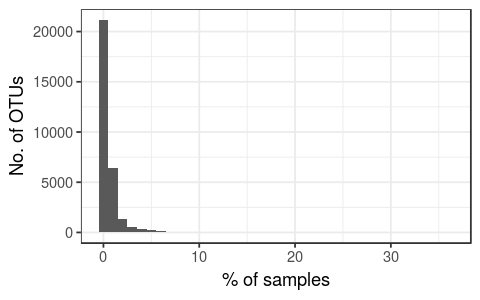

In [95]:
# plotting
p = ggplot(prev, aes(Prevalence)) +
    geom_histogram(binwidth=1) +
    labs(x='% of samples', y='No. of OTUs') +
    theme_bw()

options(repr.plot.width=4, repr.plot.height=2.5)
plot_write(p, file='IndD_sparsity-histo.pdf')

### By host class

In [96]:
# otu table
otu = physeq %>%
    otu_table %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(OTU = rownames(.)) %>%
    gather(sample, count, -OTU)

otu %>% dfhead

[1] 6451770       3


OTU,sample,count
ea2df9bcd7f6a10e0fa509d237d19c6d,X1.Eurasian.Beaver,0
130b094f31455943fb20899a36af8afd,X1.Eurasian.Beaver,0
b9b9562a0f34ad60c552f7f46d7a4b3b,X1.Eurasian.Beaver,0


In [97]:
# metdata
metadata = physeq %>%
    sample_data %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(Sample_ID = rownames(.)) %>%
    dplyr::select(Sample_ID, class, order, family, genus, scientific_name)

metadata %>% dfhead

Warning message in class(X) <- NULL:
“Setting class(x) to NULL;   result will no longer be an S4 object”

[1] 213   6


Sample_ID,class,order,family,genus,scientific_name
X1.Eurasian.Beaver,Mammalia,Rodentia,Castoridae,Castor,Castor_fiber
X101.Horse,Mammalia,Perissodactyla,Equidae,Equus,Equus_caballus
X102.Kulan,Mammalia,Perissodactyla,Equidae,Equus,Equus_hemionus


In [98]:
# determining prevalence
prev = otu %>%
    inner_join(metadata, c('sample'='Sample_ID')) %>%
    group_by(OTU, class) %>%
    summarize(Prevalence = sum(count>0) / length(count) * 100) %>%
    ungroup()
              
prev %>% dfhead

[1] 151450      3


OTU,class,Prevalence
0001fc475a4ad532d85da4d26068f1ec,Actinopterygii,0
0001fc475a4ad532d85da4d26068f1ec,Amphibia,0
0001fc475a4ad532d85da4d26068f1ec,Aves,0


## Aggregating by taxonomic level

In [99]:
# otu table
otu = physeq %>%
    otu_table %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(OTU = rownames(.)) %>%
    gather(sample, count, -OTU)

otu %>% dfhead

[1] 6451770       3


OTU,sample,count
ea2df9bcd7f6a10e0fa509d237d19c6d,X1.Eurasian.Beaver,0
130b094f31455943fb20899a36af8afd,X1.Eurasian.Beaver,0
b9b9562a0f34ad60c552f7f46d7a4b3b,X1.Eurasian.Beaver,0


In [100]:
# tax table
tax = readRDS(physeq_file) %>%
    tax_table %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(OTU = rownames(.))

tax %>% dfhead

[1] 30290     8


Domain,Phylum,Class,Order,Family,Genus,Species,OTU
Bacteria,Candidate division SR1,unclassified,unclassified,unclassified,unclassified,unclassified,ea2df9bcd7f6a10e0fa509d237d19c6d
Bacteria,Candidate division SR1,uncultured bacterium,,,,,130b094f31455943fb20899a36af8afd
Bacteria,Candidate division SR1,uncultured bacterium,,,,,b9b9562a0f34ad60c552f7f46d7a4b3b


In [101]:
# formatting tax table
tax = tax %>%
    unite(Genus, Phylum, Class, Order, Family, Genus, sep=';', remove=FALSE) %>%
    unite(Family, Phylum, Class, Order, Family, sep=';', remove=FALSE) %>%
    unite(Order, Phylum, Class, Order, sep=';', remove=FALSE) %>%
    unite(Class, Phylum, Class, sep=';', remove=FALSE) 

tax %>% dfhead

[1] 30290     8


Domain,Genus,Family,Order,Class,Phylum,Species,OTU
Bacteria,Candidate division SR1;unclassified;unclassified;unclassified;unclassified,Candidate division SR1;unclassified;unclassified;unclassified,Candidate division SR1;unclassified;unclassified,Candidate division SR1;unclassified,Candidate division SR1,unclassified,ea2df9bcd7f6a10e0fa509d237d19c6d
Bacteria,Candidate division SR1;uncultured bacterium;;;,Candidate division SR1;uncultured bacterium;;,Candidate division SR1;uncultured bacterium;,Candidate division SR1;uncultured bacterium,Candidate division SR1,,130b094f31455943fb20899a36af8afd
Bacteria,Candidate division SR1;uncultured bacterium;;;,Candidate division SR1;uncultured bacterium;;,Candidate division SR1;uncultured bacterium;,Candidate division SR1;uncultured bacterium,Candidate division SR1,,b9b9562a0f34ad60c552f7f46d7a4b3b


In [102]:
# determining prevalence
prev = otu %>%
    inner_join(tax, c('OTU')) %>%
    inner_join(metadata, c('sample'='Sample_ID')) %>%
    group_by(Genus) %>%
    summarize(Prevalence = sum(count>0) / length(count) * 100) %>%
    ungroup()
              
prev %>% dfhead

[1] 879   2


Genus,Prevalence
Acidobacteria;Acidobacteria;Acidobacteriales;Acidobacteriaceae (Subgroup 1);Acidobacterium,0.4694836
Acidobacteria;Acidobacteria;Subgroup 17;unclassified;unclassified,0.4694836
Acidobacteria;Acidobacteria;Subgroup 25;uncultured bacterium;,0.4694836


In [103]:
# joing with other data
df = otu %>%
    inner_join(tax, c('OTU')) %>%
    inner_join(metadata, c('sample'='Sample_ID')) 

df %>% dfhead

[1] 6451770      15


OTU,sample,count,Domain,Genus,Family,Order,Class,Phylum,Species,class,order,family,genus,scientific_name
ea2df9bcd7f6a10e0fa509d237d19c6d,X1.Eurasian.Beaver,0,Bacteria,Candidate division SR1;unclassified;unclassified;unclassified;unclassified,Candidate division SR1;unclassified;unclassified;unclassified,Candidate division SR1;unclassified;unclassified,Candidate division SR1;unclassified,Candidate division SR1,unclassified,Mammalia,Rodentia,Castoridae,Castor,Castor_fiber
130b094f31455943fb20899a36af8afd,X1.Eurasian.Beaver,0,Bacteria,Candidate division SR1;uncultured bacterium;;;,Candidate division SR1;uncultured bacterium;;,Candidate division SR1;uncultured bacterium;,Candidate division SR1;uncultured bacterium,Candidate division SR1,,Mammalia,Rodentia,Castoridae,Castor,Castor_fiber
b9b9562a0f34ad60c552f7f46d7a4b3b,X1.Eurasian.Beaver,0,Bacteria,Candidate division SR1;uncultured bacterium;;;,Candidate division SR1;uncultured bacterium;;,Candidate division SR1;uncultured bacterium;,Candidate division SR1;uncultured bacterium,Candidate division SR1,,Mammalia,Rodentia,Castoridae,Castor,Castor_fiber


In [104]:
# determining prevalence for each taxonomic level
prev_each_level = function(lev, df){
    df = df %>%
        group_by_('sample', lev) %>%
        summarize(count = sum(count)) %>%
        group_by_(lev) %>%
        summarize(Prevalence = sum(count>0) / length(count) * 100) %>%
        ungroup()
    colnames(df) = c('Group', 'Prevalence')
    df$Taxonomic_level = lev
    return(df)
}

levs = c('Phylum', 'Class', 'Order', 'Family', 'Genus', 'OTU')
doParallel::registerDoParallel(threads)
prev = plyr::llply(as.list(levs), prev_each_level, df=df, .parallel=TRUE)
prev = do.call(rbind, prev) %>%
    mutate(Taxonomic_level = factor(Taxonomic_level, levels=levs))

prev %>% dfhead

[1] 31841     3


Group,Prevalence,Taxonomic_level
Acidobacteria,3.755869,Phylum
Actinobacteria,85.915493,Phylum
Armatimonadetes,4.694836,Phylum


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/IndD_sparsity-histo_by-microTax.pdf 


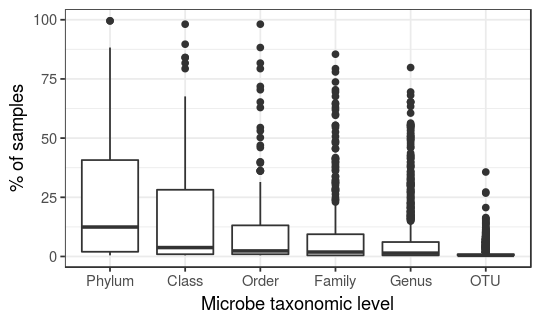

In [105]:
# plotting
p = ggplot(prev, aes(Taxonomic_level, Prevalence)) +
    geom_boxplot() +
    labs(y='% of samples', x='Microbe taxonomic level') +
    theme_bw()

options(repr.plot.width=4.5, repr.plot.height=2.7)
plot_write(p, file='IndD_sparsity-histo_by-microTax.pdf')

### Most prevalent taxonomic groups

In [106]:
prev %>%
    filter(Prevalence > 70) %>%
    dplyr::select(Taxonomic_level, Group, Prevalence) %>%
    mutate(Prevalence = round(Prevalence, 1)) %>%
    arrange(-Prevalence, Taxonomic_level, Group)

Taxonomic_level,Group,Prevalence
Phylum,Firmicutes,99.5
Phylum,Proteobacteria,99.5
Class,Firmicutes;Clostridia,98.1
Order,Firmicutes;Clostridia;Clostridiales,98.1
Class,Proteobacteria;Betaproteobacteria,89.7
Phylum,Bacteroidetes,88.3
Order,Proteobacteria;Betaproteobacteria;Burkholderiales,88.3
Phylum,Actinobacteria,85.9
Family,Firmicutes;Clostridia;Clostridiales;Lachnospiraceae,85.4
Class,Firmicutes;Bacilli,84.0


# Sparsity by % of species

## Sparsity plot

In [107]:
# otu pres/abs table
otu = physeq %>%
    otu_table %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(OTU = rownames(.)) %>%
    gather(Sample, Abundance, -OTU) %>%
    filter(Abundance > 0) %>%
    mutate(Abundance = ifelse(Abundance > 0, 1, 0))

otu %>% dfhead

[1] 54783     3


OTU,Sample,Abundance
13f82e5ba9ba27ea09f601e01ff70522,X1.Eurasian.Beaver,1
3dab8da99409c887717be58cb16f1934,X1.Eurasian.Beaver,1
a6dcf57735588b8f1a3fb7c8469d4396,X1.Eurasian.Beaver,1


In [108]:
# metdata
metadata = physeq %>%
    sample_data %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(Sample_ID = rownames(.)) %>%
    dplyr::select(Sample_ID, class, order, family, genus, scientific_name)

metadata %>% dfhead

Warning message in class(X) <- NULL:
“Setting class(x) to NULL;   result will no longer be an S4 object”

[1] 213   6


Sample_ID,class,order,family,genus,scientific_name
X1.Eurasian.Beaver,Mammalia,Rodentia,Castoridae,Castor,Castor_fiber
X101.Horse,Mammalia,Perissodactyla,Equidae,Equus,Equus_caballus
X102.Kulan,Mammalia,Perissodactyla,Equidae,Equus,Equus_hemionus


In [109]:
# adding metadata and determining presence in any individuals of the species
otu = otu %>%
    inner_join(metadata, c('Sample'='Sample_ID')) %>%
    group_by(OTU, scientific_name, class, order, family, genus) %>%
    summarize(Abundance = ifelse(sum(Abundance) > 0, 1, 0)) %>%
    ungroup()

otu %>% dfhead

[1] 44197     7


OTU,scientific_name,class,order,family,genus,Abundance
0001fc475a4ad532d85da4d26068f1ec,Lepus_europaeus,Mammalia,Lagomorpha,Leporidae,Lepus,1
0001fc475a4ad532d85da4d26068f1ec,Nycticebus_pygmaeus,Mammalia,Primates,Lorisidae,Nycticebus,1
0003924139f23b61d50e68466e863de4,Testudo_hermanni,Reptilia,Squamata,Testudinidae,Testudo,1


In [110]:
# prevalence
n_spec = metadata$scientific_name %>% unique %>% length
n_spec %>% print

otu_s = otu %>%
    group_by(OTU) %>%
    summarize(Prevalence = sum(Abundance) / n_spec * 100) %>%
    ungroup()

otu_s %>% dfhead

[1] 128
[1] 30290     2


OTU,Prevalence
0001fc475a4ad532d85da4d26068f1ec,1.56250
0003924139f23b61d50e68466e863de4,0.78125
00057660e4817a98b6fad8f00075bf08,0.78125


In [111]:
# summary
prev$Prevalence %>% summary %>% print

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4695  0.4695  0.4695  1.2478  0.9390 99.5305 


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/IndD_bySpec_sparsity-histo.pdf 


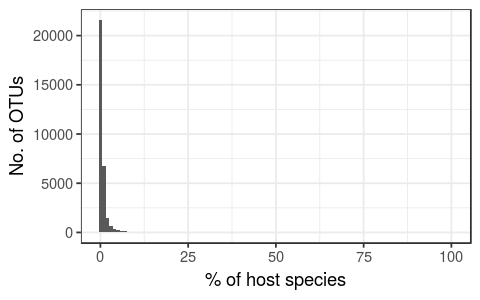

In [112]:
# plotting
p = ggplot(prev, aes(Prevalence)) +
    geom_histogram(binwidth=1) +
    labs(x='% of host species', y='No. of OTUs') +
    theme_bw()

options(repr.plot.width=4, repr.plot.height=2.5)
plot_write(p, file='IndD_bySpec_sparsity-histo.pdf')

## By host class

In [113]:
# prevalence
n_spec = otu %>%
    group_by(class) %>%
    summarize(n_spec = scientific_name %>% unique %>% length) %>%
    ungroup()

otu_s = otu %>%
    inner_join(n_spec, c('class')) %>%
    group_by(OTU, class) %>%
    summarize(Prevalence = sum(Abundance) / first(n_spec) * 100) %>%
    ungroup()

otu_s %>% dfhead

[1] 31207     3


OTU,class,Prevalence
0001fc475a4ad532d85da4d26068f1ec,Mammalia,2.439024
0003924139f23b61d50e68466e863de4,Reptilia,12.500000
00057660e4817a98b6fad8f00075bf08,Mammalia,1.219512


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/IndD_bySpec_byHostClass_sparsity-boxplot.pdf 


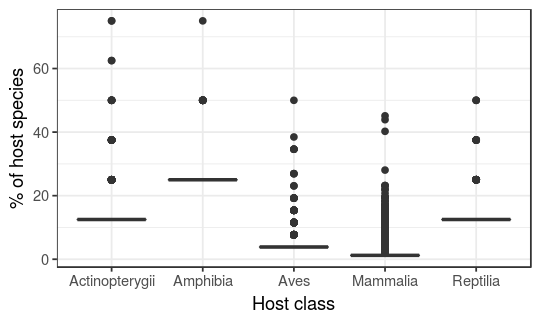

In [114]:
# plotting
p = ggplot(otu_s, aes(class, Prevalence)) +
    geom_boxplot() +
    labs(y='% of host species', x='Host class') +
    theme_bw()

options(repr.plot.width=4.5, repr.plot.height=2.7)
plot_write(p, file='IndD_bySpec_byHostClass_sparsity-boxplot.pdf')

## By microbial taxonomy

In [115]:
tax = physeq %>%
    tax_table %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(OTU = rownames(.)) %>%
    ungroup() %>%
    unite(Genus, Phylum, Class, Order, Family, Genus, sep=';', remove=FALSE) %>%
    unite(Family, Phylum, Class, Order, Family, sep=';', remove=FALSE) %>%
    unite(Order, Phylum, Class, Order, sep=';', remove=FALSE) %>%
    unite(Class, Phylum, Class, sep=';', remove=FALSE) 

tax %>% dfhead

[1] 30290     8


Domain,Genus,Family,Order,Class,Phylum,Species,OTU
Bacteria,Candidate division SR1;unclassified;unclassified;unclassified;unclassified,Candidate division SR1;unclassified;unclassified;unclassified,Candidate division SR1;unclassified;unclassified,Candidate division SR1;unclassified,Candidate division SR1,unclassified,ea2df9bcd7f6a10e0fa509d237d19c6d
Bacteria,Candidate division SR1;uncultured bacterium;;;,Candidate division SR1;uncultured bacterium;;,Candidate division SR1;uncultured bacterium;,Candidate division SR1;uncultured bacterium,Candidate division SR1,,130b094f31455943fb20899a36af8afd
Bacteria,Candidate division SR1;uncultured bacterium;;;,Candidate division SR1;uncultured bacterium;;,Candidate division SR1;uncultured bacterium;,Candidate division SR1;uncultured bacterium,Candidate division SR1,,b9b9562a0f34ad60c552f7f46d7a4b3b


In [116]:
# determining prevalence for each taxonomic level
prev_each_level = function(lev, df, n_spec){
    df = df %>%
        group_by_('scientific_name', lev) %>%
        summarize(Abundance = sum(Abundance)) %>%
        group_by_(lev) %>%
        summarize(Prevalence = sum(Abundance>0) / n_spec * 100) %>%
        ungroup()
    colnames(df) = c('Group', 'Prevalence')
    df$Taxonomic_level = lev
    return(df)
}

In [117]:
# prevalence
n_spec = metadata$scientific_name %>% unique %>% length
n_spec %>% print

otu_s = otu %>%
    inner_join(tax, c('OTU')) 

levs = c('Phylum', 'Class', 'Order', 'Family', 'Genus', 'OTU')
doParallel::registerDoParallel(threads)
otu_s = plyr::llply(as.list(levs), prev_each_level, df=otu_s, n_spec=n_spec, .parallel=TRUE)

otu_s = do.call(rbind, otu_s) %>%
    mutate(Taxonomic_level = factor(Taxonomic_level, levels=levs))

otu_s %>% dfhead

[1] 128
[1] 31841     3


Group,Prevalence,Taxonomic_level
Acidobacteria,6.25000,Phylum
Actinobacteria,86.71875,Phylum
Armatimonadetes,5.46875,Phylum


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/IndD_bySpec_sparsity-histo_by-microTax.pdf 


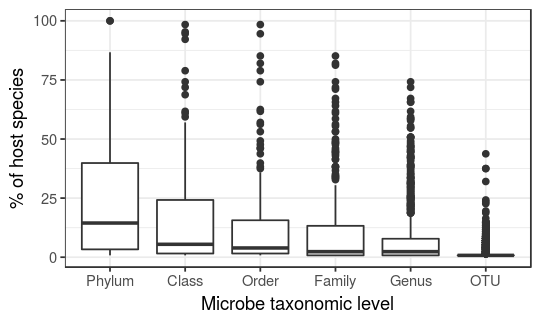

In [118]:
# plotting
p = ggplot(otu_s, aes(Taxonomic_level, Prevalence)) +
    geom_boxplot() +
    labs(y='% of host species',
         x='Microbe taxonomic level') +
    theme_bw()

options(repr.plot.width=4.5, repr.plot.height=2.7)
plot_write(p, file='IndD_bySpec_sparsity-histo_by-microTax.pdf')

### Most prevalent taxonomic groups

In [119]:
otu_s_f = otu_s %>%
    filter(Prevalence > 75) %>%
    dplyr::select(Taxonomic_level, Group, Prevalence) %>%
    mutate(Prevalence = round(Prevalence, 1)) %>%
    arrange(-Prevalence, Taxonomic_level, Group)

otu_s_f

Taxonomic_level,Group,Prevalence
Phylum,Firmicutes,100.0
Phylum,Proteobacteria,100.0
Class,Firmicutes;Clostridia,98.4
Order,Firmicutes;Clostridia;Clostridiales,98.4
Class,Proteobacteria;Betaproteobacteria,95.3
Class,Proteobacteria;Gammaproteobacteria,94.5
Order,Proteobacteria;Betaproteobacteria;Burkholderiales,94.5
Class,Firmicutes;Bacilli,92.2
Phylum,Actinobacteria,86.7
Phylum,Bacteroidetes,85.9


In [120]:
out_file = file.path(work_dir, 'IndD_bySpec_mostPrev.tsv')
write.table(otu_s_f, out_file, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', out_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/sparsity//IndD_bySpec_mostPrev.tsv 


# sessionInfo

In [121]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.1 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2  phyloseq_1.22.3 ggplot2_3.0.0   tidyr_0.8.1    
[5] dplyr_0.7.6    

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17        ape_5.1             lattice_0.20-34    
 [4] Biostrings_2.46.0   assertthat_0.2.0    digest_0.6.15      
 [7] foreach_1.4.4       IRdisplay_0.4.4     R6_2.2.2           
[10] plyr_1.8.4          repr_0.15.0         stats4_3.4.1       
[13] evaluate_0.10.1     pillar_1.2.2        zlibbioc_1.24.0    
[16] rlang_0.2.1         lazyeval_0.2.1      uuid_0.1-2         
[19] data.table_